#NYC SALE PRICE PREDICTION

The goal of this assignment is to analyze 3 years’(2018-2020) house sales data provided by New York City (NYC) goverment and build regression model to predict house price. NYC has five boroughs, i.e., Bronx, Brooklyn, Manhattan, Queens and Staten Island. Sales of houses in each borough has been provided.

#Read dataset & merge data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import os

In [3]:
files_path = os.path.join("/content/lab2-dataset", "*.csv")

In [4]:
files = glob.glob(files_path)

In [5]:
files

['/content/lab2-dataset/2019_manhattan.csv',
 '/content/lab2-dataset/2020_statenisland.csv',
 '/content/lab2-dataset/2019_brooklyn.csv',
 '/content/lab2-dataset/2019_queens.csv',
 '/content/lab2-dataset/2020_brooklyn.csv',
 '/content/lab2-dataset/2018_brooklyn.csv',
 '/content/lab2-dataset/2018_bronx.csv',
 '/content/lab2-dataset/2018_manhattan.csv',
 '/content/lab2-dataset/2019_bronx.csv',
 '/content/lab2-dataset/2018_queens.csv',
 '/content/lab2-dataset/2020_manhattan.csv',
 '/content/lab2-dataset/2020_queens.csv',
 '/content/lab2-dataset/2020_bronx.csv',
 '/content/lab2-dataset/2018_statenisland.csv',
 '/content/lab2-dataset/2019_statenisland.csv']

In [6]:
df = pd.read_csv('/content/lab2-dataset/2020_queens.csv', index_col=None, header=0)
print(len(df.columns))
df.columns

21


Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       ' SALE PRICE ', 'SALE DATE'],
      dtype='object')

In [7]:
columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE']

In [8]:
df_list = []   
for filename in files:
    df = pd.read_csv(filename, index_col=None,header=None, 
     names=columns, skiprows=1)
    df_list.append(df)

df = pd.concat(df_list, axis=0, ignore_index=True)

In [9]:
df.shape

(277803, 21)

In [10]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,NaN,...,1.0,1.0,2.0,"2,090","3,680",1940.0,1.0,S1,"3,200,000",2019-07-24
1,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,NaN,A4,189 EAST 7TH STREET,NaN,...,1.0,0.0,1.0,987,"2,183",1860.0,1.0,A4,0,2019-09-25
2,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404.0,1.0,NaN,B9,166 AVENUE A,NaN,...,2.0,0.0,2.0,"1,510","4,520",1900.0,1.0,B9,0,2019-07-22
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,"2,430","3,600",1899.0,1.0,C0,"6,300,000",2019-04-30
4,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393.0,9.0,NaN,C0,604 EAST 11TH STREET,NaN,...,3.0,0.0,3.0,"2,375","5,110",1939.0,1.0,C0,0,2019-10-24


#Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277803 entries, 0 to 277802
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         230659 non-null  float64
 1   NEIGHBORHOOD                    230659 non-null  object 
 2   BUILDING CLASS CATEGORY         230659 non-null  object 
 3   TAX CLASS AT PRESENT            230386 non-null  object 
 4   BLOCK                           230659 non-null  float64
 5   LOT                             230659 non-null  float64
 6   EASE-MENT                       0 non-null       float64
 7   BUILDING CLASS AT PRESENT       230386 non-null  object 
 8   ADDRESS                         230659 non-null  object 
 9   APARTMENT NUMBER                50782 non-null   object 
 10  ZIP CODE                        230642 non-null  float64
 11  RESIDENTIAL UNITS               199734 non-null  object 
 12  COMMERCIAL UNITS

In [12]:
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,230659.000000,230659.000000,230659.000000,0.0,230642.000000,220373.000000,230659.000000
mean,3.019045,4422.239262,357.502035,NaN,10844.556651,1892.753795,1.619104
std,1.274595,3655.509089,653.040020,NaN,725.670609,332.153910,0.801899
min,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,1.000000
25%,2.000000,1366.000000,22.000000,NaN,10307.000000,1921.000000,1.000000
50%,3.000000,3558.000000,49.000000,NaN,11210.000000,1941.000000,1.000000
75%,4.000000,6574.000000,316.000000,NaN,11358.000000,1970.000000,2.000000
max,5.000000,16350.000000,9116.000000,NaN,11697.000000,2021.000000,4.000000


In [13]:
# Select categorical columns
categorical_feature = [f for f in df.columns if df[f].dtype == "object"]
categorical_feature

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

In [14]:
# Select numerical columns
numerical_feature = [f for f in df.columns if df[f].dtype == 'float64']
numerical_feature

['BOROUGH',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'ZIP CODE',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE']

##check any duplication

In [15]:
df.duplicated().any()

True

In [16]:
df.duplicated(subset = None)

0         False
1         False
2         False
3         False
4         False
          ...  
277798     True
277799     True
277800     True
277801     True
277802     True
Length: 277803, dtype: bool

In [17]:
df[df.duplicated(subset = None)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1056,1.0,CIVIC CENTER,10 COOPS - ELEVATOR APARTMENTS,2,161.0,1.0,NaN,D4,"180 PARK ROW, 8B",NaN,...,NaN,NaN,NaN,NaN,NaN,1965.0,2.0,D4,0,2019-06-17
1061,1.0,CIVIC CENTER,10 COOPS - ELEVATOR APARTMENTS,2,161.0,1.0,NaN,D4,"180 PARK ROW, 8B",NaN,...,NaN,NaN,NaN,NaN,NaN,1965.0,2.0,D4,0,2019-06-17
1412,1.0,CLINTON,10 COOPS - ELEVATOR APARTMENTS,2,1066.0,37.0,NaN,D4,"408 WEST 57TH STREET, 7I",NaN,...,NaN,NaN,NaN,NaN,NaN,1957.0,2.0,D4,0,2019-03-19
1900,1.0,FASHION,23 LOFT BUILDINGS,4,805.0,39.0,NaN,O6,"115 WEST 29TH STREET, 8",NaN,...,0.0,15.0,15.0,"6,994","79,465",1913.0,4.0,L1,"6,200,000",2019-06-26
2803,1.0,GRAMERCY,10 COOPS - ELEVATOR APARTMENTS,2,904.0,50.0,NaN,D4,"200 EAST 24TH STREET, 710",NaN,...,NaN,NaN,NaN,NaN,NaN,1972.0,2.0,D4,0,2019-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#check if there exist any true value to check for duplications
df.duplicated(subset = None).value_counts()

False    229893
True      47910
dtype: int64

In [19]:
#checking for number of duplications
df.duplicated().sum()

47910

In [20]:
# dropping ALL duplicate values
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(229893, 21)

##check any missing values

In [23]:
#count the ratio of missing values
def ratio_missing_values():
  total_miss = df.isnull().sum()
  percent_miss = (total_miss/df.isnull().count()*100)
  # sort attributes by missing value ratio
  missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
  print(missing_data.sort_values(by='Total missing',ascending=False))

In [24]:
ratio_missing_values()

                                Total missing   % missing
EASE-MENT                              229893  100.000000
APARTMENT NUMBER                       179274   77.981496
LAND SQUARE FEET                        42966   18.689564
GROSS SQUARE FEET                       42965   18.689129
COMMERCIAL UNITS                        41336   17.980539
RESIDENTIAL UNITS                       30879   13.431901
TOTAL UNITS                             29250   12.723310
YEAR BUILT                              10276    4.469906
TAX CLASS AT PRESENT                      274    0.119186
BUILDING CLASS AT PRESENT                 274    0.119186
ZIP CODE                                   18    0.007830
SALE PRICE                                  1    0.000435
BUILDING CLASS AT TIME OF SALE              1    0.000435
TAX CLASS AT TIME OF SALE                   1    0.000435
BOROUGH                                     1    0.000435
NEIGHBORHOOD                                1    0.000435
ADDRESS       

In [25]:
import missingno as msno

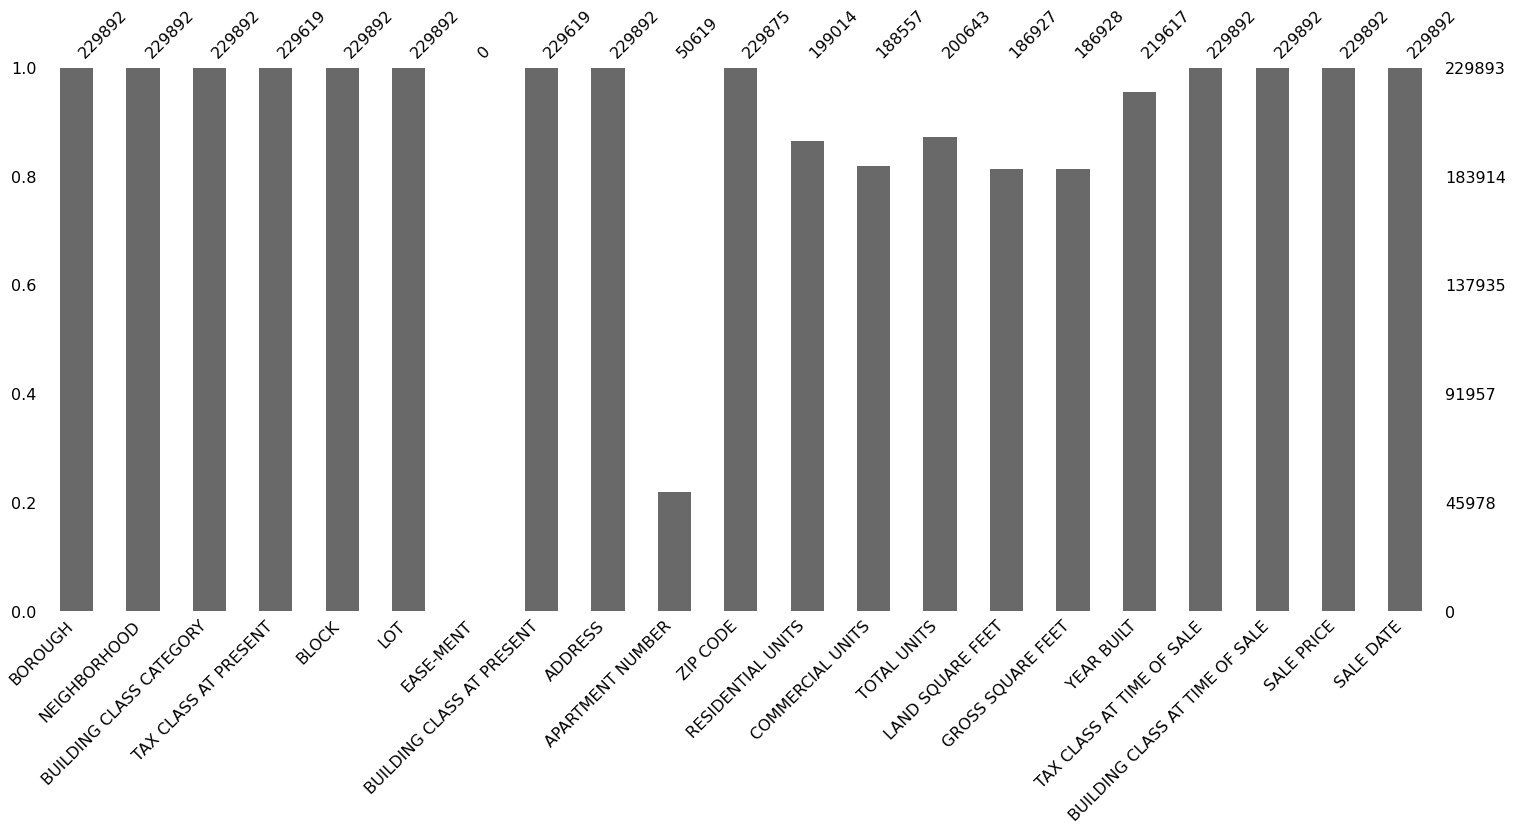

In [26]:
#bar chart
msno.bar(df)

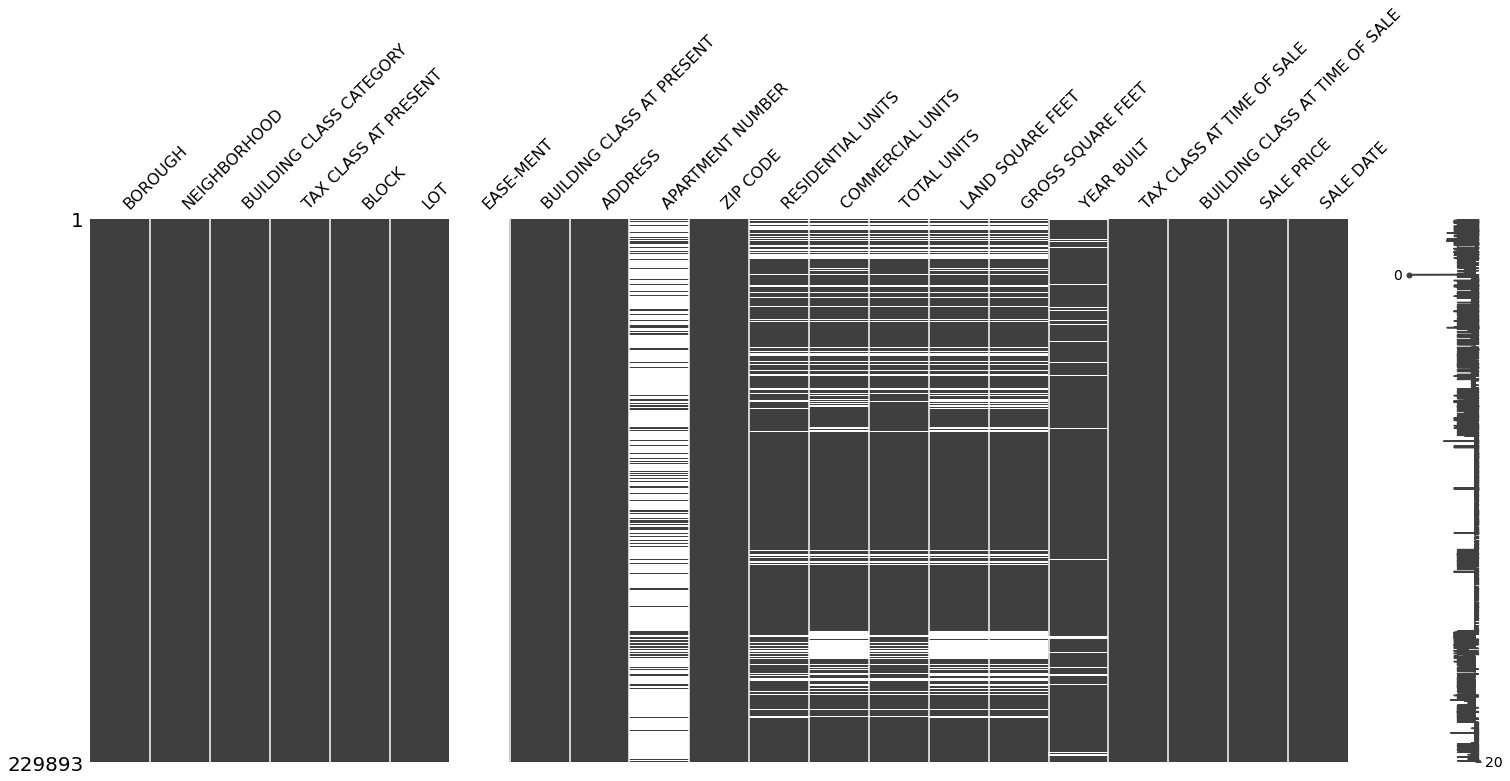

In [27]:
#visualize missing values as a matrix
msno.matrix(df)

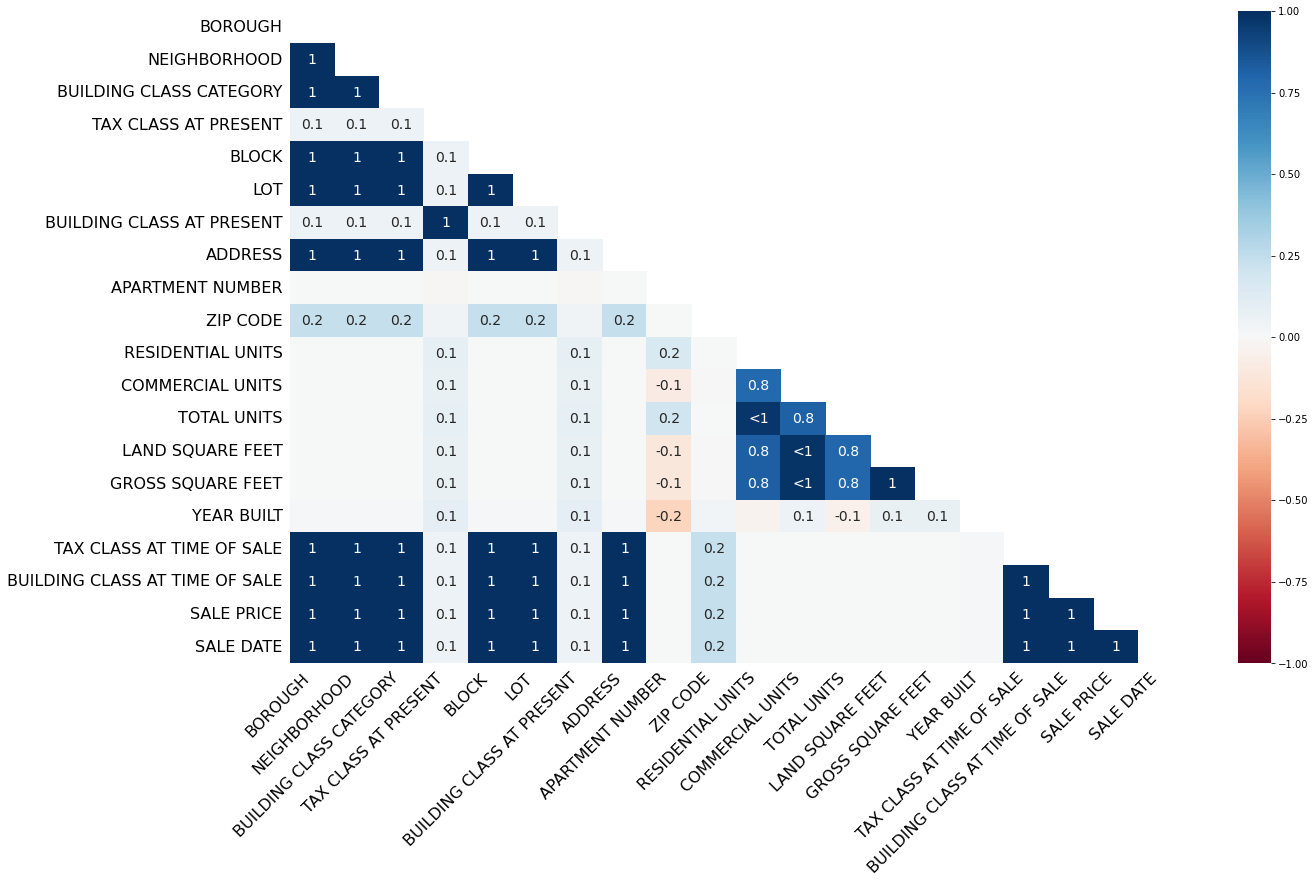

In [28]:
#heapmap for correlation analysis
msno.heatmap(df)

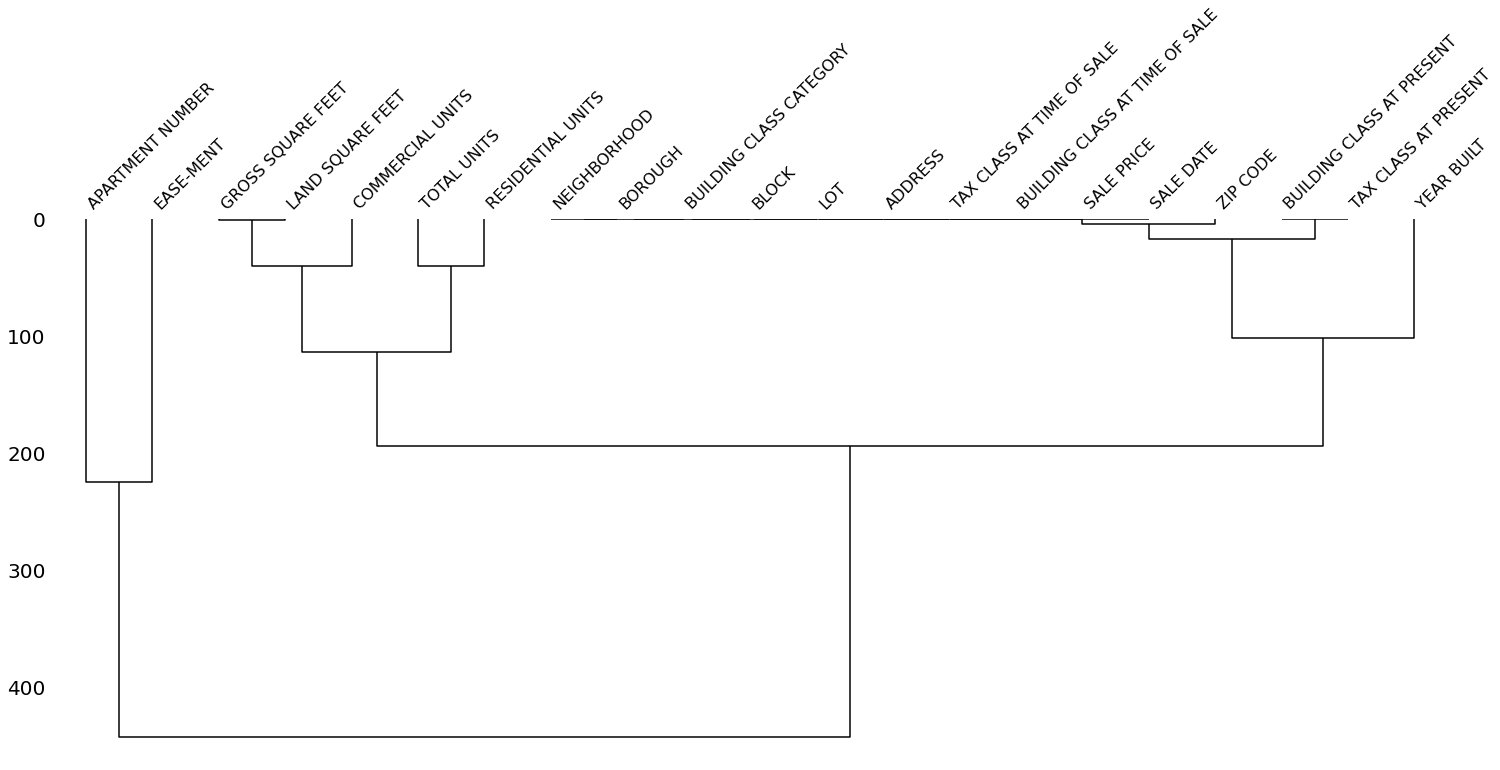

In [29]:
#dendrogram plot
msno.dendrogram(df)

In [30]:
ratio_missing_values()

                                Total missing   % missing
EASE-MENT                              229893  100.000000
APARTMENT NUMBER                       179274   77.981496
LAND SQUARE FEET                        42966   18.689564
GROSS SQUARE FEET                       42965   18.689129
COMMERCIAL UNITS                        41336   17.980539
RESIDENTIAL UNITS                       30879   13.431901
TOTAL UNITS                             29250   12.723310
YEAR BUILT                              10276    4.469906
TAX CLASS AT PRESENT                      274    0.119186
BUILDING CLASS AT PRESENT                 274    0.119186
ZIP CODE                                   18    0.007830
SALE PRICE                                  1    0.000435
BUILDING CLASS AT TIME OF SALE              1    0.000435
TAX CLASS AT TIME OF SALE                   1    0.000435
BOROUGH                                     1    0.000435
NEIGHBORHOOD                                1    0.000435
ADDRESS       

In [31]:
#selecting list of columns has more 20% missing values
listofcolhasmorenullvalueall=df.columns[df.isnull().sum()>((20*df.shape[0])/100)]
listofcolhasmorenullvalueall

Index(['EASE-MENT', 'APARTMENT NUMBER'], dtype='object')

In [32]:
df.drop(['EASE-MENT', 'APARTMENT NUMBER'],inplace=True, axis=1)

In [33]:
ratio_missing_values()

                                Total missing  % missing
LAND SQUARE FEET                        42966  18.689564
GROSS SQUARE FEET                       42965  18.689129
COMMERCIAL UNITS                        41336  17.980539
RESIDENTIAL UNITS                       30879  13.431901
TOTAL UNITS                             29250  12.723310
YEAR BUILT                              10276   4.469906
TAX CLASS AT PRESENT                      274   0.119186
BUILDING CLASS AT PRESENT                 274   0.119186
ZIP CODE                                   18   0.007830
SALE PRICE                                  1   0.000435
BUILDING CLASS AT TIME OF SALE              1   0.000435
TAX CLASS AT TIME OF SALE                   1   0.000435
BOROUGH                                     1   0.000435
NEIGHBORHOOD                                1   0.000435
ADDRESS                                     1   0.000435
LOT                                         1   0.000435
BLOCK                          

##Inspect each feature

###SALE PRICE

In [34]:
df['SALE PRICE'].value_counts()

0             47024
$0            24979
10             1537
650,000         775
$10             760
              ...  
$2,393,750        1
$291,180          1
$275,819          1
$161,178          1
599,701           1
Name: SALE PRICE, Length: 22467, dtype: int64

In [35]:
df['SALE PRICE'].isnull().sum()

1

In [36]:
# remove rows with missing SALE PRICE
df = df[df['SALE PRICE'].notnull()]

In [37]:
df['SALE PRICE'] = df['SALE PRICE'].str.replace(',', '')
df['SALE PRICE'] = df['SALE PRICE'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [38]:
df['SALE PRICE'].value_counts()

0          72003
10          2297
650000      1219
550000      1150
600000      1139
           ...  
1550680        1
1300007        1
1188500        1
1170026        1
599701         1
Name: SALE PRICE, Length: 18959, dtype: int64

In [39]:
df['SALE PRICE'].dtypes

dtype('O')

In [40]:
df['SALE PRICE']=df['SALE PRICE'].astype(int)

In [41]:
df['SALE PRICE'].dtypes

dtype('int64')

In [42]:
df['SALE PRICE'].value_counts()

0          72003
10          2297
650000      1219
550000      1150
600000      1139
           ...  
1550680        1
1300007        1
1188500        1
1170026        1
599701         1
Name: SALE PRICE, Length: 18959, dtype: int64

In [43]:
#remove rows when SALE PRICE == 0
df = df[df['SALE PRICE'] != 0]

In [44]:
df['SALE PRICE'].value_counts()

10         2297
650000     1219
550000     1150
600000     1139
750000     1113
           ... 
1207781       1
1139349       1
1162672       1
1143422       1
599701        1
Name: SALE PRICE, Length: 18958, dtype: int64

check outiers

In [45]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

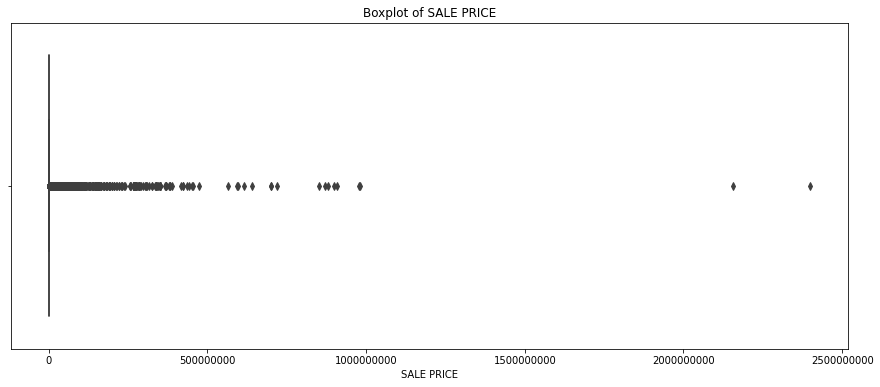

In [46]:
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE')
plt.show()

In [47]:
#calculate Interquartile Range IQR
Q1 = df['SALE PRICE'].quantile(0.25)
Q3 = df['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

In [48]:
df[ df['SALE PRICE'] > (Q3+1.5*IQR)].shape

(16928, 19)

In [49]:
df[ df['SALE PRICE'] < (Q1-(1.5*IQR))].shape

(0, 19)

In [50]:
#remove rows when SALE PRICE is outliers
df=df[ df['SALE PRICE'] < (Q3+1.5*IQR)]

In [51]:
df.shape

(140960, 19)

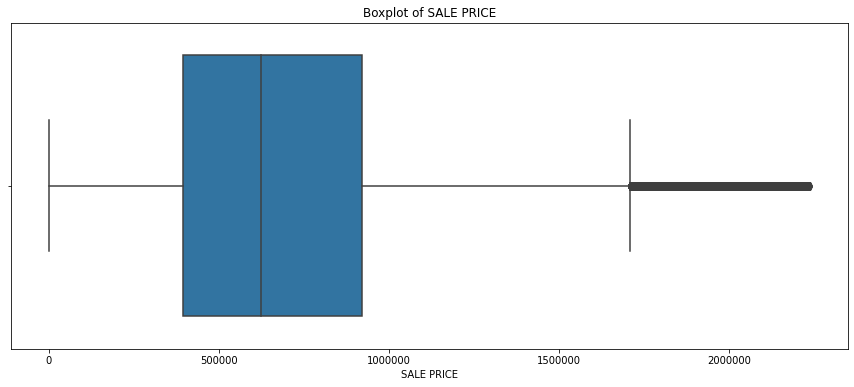

In [52]:
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE')
plt.show()
     

###LAND SQUARE FEET

In [53]:
df['LAND SQUARE FEET'].value_counts()

0         31123
2,000      6332
2,500      5579
4,000      5325
3,000      2243
          ...  
7,255         1
27,622        1
47,493        1
7,394         1
8,846         1
Name: LAND SQUARE FEET, Length: 6914, dtype: int64

In [54]:
df['LAND SQUARE FEET'].unique()

array(['2,393', '2,059', '2,772', ..., '4,346', '6,274', '8,846'],
      dtype=object)

In [55]:
df['LAND SQUARE FEET'].isnull().sum()

31184

In [56]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].str.replace(',', '')

In [57]:
df['LAND SQUARE FEET'].dtypes

dtype('O')

In [58]:
df[df['LAND SQUARE FEET'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
38,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,40.0,C6,"327 EAST 3RD STREET, 4B",10009.0,NaN,NaN,NaN,NaN,NaN,1920.0,2.0,C6,550000,2019-10-30
39,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,46.0,C6,"317 EAST 3RD STREET, B",10009.0,NaN,NaN,NaN,NaN,NaN,1925.0,2.0,C6,690000,2019-12-09
40,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49.0,C6,"311 EAST 3RD STREET, 30",10009.0,NaN,NaN,NaN,NaN,NaN,1920.0,2.0,C6,465000,2019-10-28
41,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49.0,C6,"311 EAST 3RD STREET, 29",10009.0,NaN,NaN,NaN,NaN,NaN,1920.0,2.0,C6,420000,2019-10-04
42,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,374.0,65.0,C6,"309 EAST 4TH STREET, 1D",10009.0,NaN,NaN,NaN,NaN,NaN,1900.0,2.0,C6,25423,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269095,5.0,ROSEBANK,09 COOPS - WALKUP APARTMENTS,2,2986.0,12.0,C6,"416 MARYLAND AVENUE, 1D",10305.0,NaN,NaN,NaN,NaN,NaN,1974.0,2.0,C6,230000,2019-05-13
269096,5.0,ROSEBANK,09 COOPS - WALKUP APARTMENTS,2,2986.0,12.0,C6,"392 MARYLAND AVENUE, 2B",10305.0,NaN,NaN,NaN,NaN,NaN,1974.0,2.0,C6,172480,2019-07-12
270651,5.0,WEST NEW BRIGHTON,09 COOPS - WALKUP APARTMENTS,2,101.0,525.0,C6,"515 CASTLETON AVENUE, 1G",10301.0,NaN,NaN,NaN,NaN,NaN,1950.0,2.0,C6,200000,2019-01-18
270652,5.0,WEST NEW BRIGHTON,09 COOPS - WALKUP APARTMENTS,2,101.0,537.0,C6,"559 CASTLETON AVENUE, 2D",10301.0,NaN,NaN,NaN,NaN,NaN,1950.0,2.0,C6,167000,2019-07-02


In [59]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].astype(float)

In [60]:
df['LAND SQUARE FEET'].dtypes

dtype('float64')

###GROSS SQUARE FEET

In [61]:
df['GROSS SQUARE FEET'].value_counts()

0        27804
2,400      643
1,600      631
1,440      615
1,200      605
         ...  
3,153        1
4,908        1
5,763        1
6,011        1
1,961        1
Name: GROSS SQUARE FEET, Length: 4913, dtype: int64

In [62]:
df['GROSS SQUARE FEET'].unique()

array(['7,989', '4,154', '13,248', ..., '8,151', '4,772', '1,961'],
      dtype=object)

In [63]:
df['GROSS SQUARE FEET'].isnull().sum()

31184

In [64]:
df['GROSS SQUARE FEET'].dtypes

dtype('O')

In [65]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace(',', '')

In [66]:
df[df['GROSS SQUARE FEET'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
38,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,40.0,C6,"327 EAST 3RD STREET, 4B",10009.0,NaN,NaN,NaN,NaN,NaN,1920.0,2.0,C6,550000,2019-10-30
39,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,46.0,C6,"317 EAST 3RD STREET, B",10009.0,NaN,NaN,NaN,NaN,NaN,1925.0,2.0,C6,690000,2019-12-09
40,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49.0,C6,"311 EAST 3RD STREET, 30",10009.0,NaN,NaN,NaN,NaN,NaN,1920.0,2.0,C6,465000,2019-10-28
41,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49.0,C6,"311 EAST 3RD STREET, 29",10009.0,NaN,NaN,NaN,NaN,NaN,1920.0,2.0,C6,420000,2019-10-04
42,1.0,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,374.0,65.0,C6,"309 EAST 4TH STREET, 1D",10009.0,NaN,NaN,NaN,NaN,NaN,1900.0,2.0,C6,25423,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269095,5.0,ROSEBANK,09 COOPS - WALKUP APARTMENTS,2,2986.0,12.0,C6,"416 MARYLAND AVENUE, 1D",10305.0,NaN,NaN,NaN,NaN,NaN,1974.0,2.0,C6,230000,2019-05-13
269096,5.0,ROSEBANK,09 COOPS - WALKUP APARTMENTS,2,2986.0,12.0,C6,"392 MARYLAND AVENUE, 2B",10305.0,NaN,NaN,NaN,NaN,NaN,1974.0,2.0,C6,172480,2019-07-12
270651,5.0,WEST NEW BRIGHTON,09 COOPS - WALKUP APARTMENTS,2,101.0,525.0,C6,"515 CASTLETON AVENUE, 1G",10301.0,NaN,NaN,NaN,NaN,NaN,1950.0,2.0,C6,200000,2019-01-18
270652,5.0,WEST NEW BRIGHTON,09 COOPS - WALKUP APARTMENTS,2,101.0,537.0,C6,"559 CASTLETON AVENUE, 2D",10301.0,NaN,NaN,NaN,NaN,NaN,1950.0,2.0,C6,167000,2019-07-02


In [67]:
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].astype(float)

In [68]:
df['GROSS SQUARE FEET'].dtypes

dtype('float64')

###LAND SQUARE FEET & GROSS SQUARE FEET

In [69]:
df[['LAND SQUARE FEET','GROSS SQUARE FEET']].isnull().sum()

LAND SQUARE FEET     31184
GROSS SQUARE FEET    31184
dtype: int64

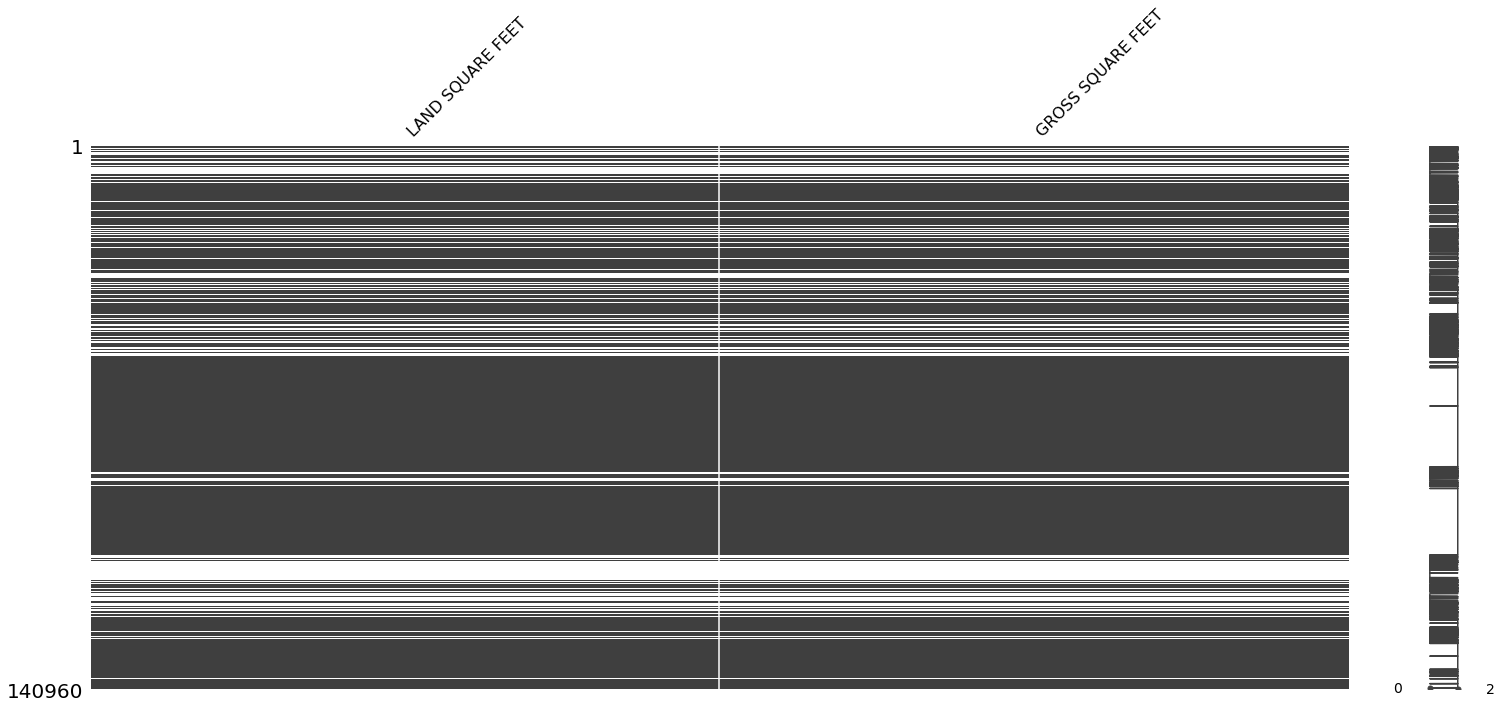

In [70]:
msno.matrix(df[['LAND SQUARE FEET','GROSS SQUARE FEET']])

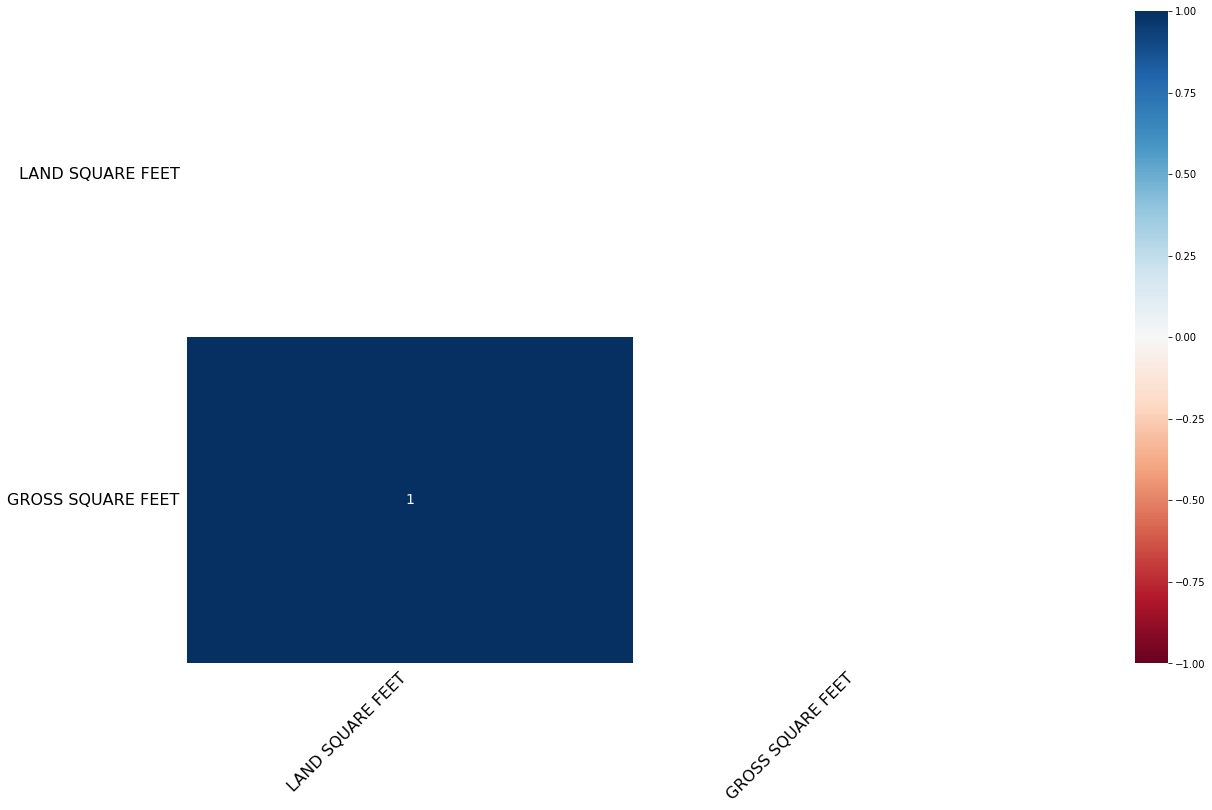

In [71]:
#heapmap for correlation analysis
msno.heatmap(df[['LAND SQUARE FEET','GROSS SQUARE FEET']])

In [72]:
df[['LAND SQUARE FEET','GROSS SQUARE FEET']]

,LAND SQUARE FEET,GROSS SQUARE FEET
5,2393.0,7989.0
8,2059.0,4154.0
10,2772.0,13248.0
11,4542.0,18254.0
12,2169.0,6294.0
...,...,...
271304,2730.0,2565.0
271306,8846.0,1710.0
271307,0.0,0.0
271308,0.0,0.0


In [73]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [74]:
imputer = IterativeImputer(max_iter=20)
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']] = imputer.fit_transform(df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']])

In [75]:
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']].isnull().sum()

LAND SQUARE FEET     0
GROSS SQUARE FEET    0
dtype: int64

In [76]:
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]

,LAND SQUARE FEET,GROSS SQUARE FEET
5,2393.0,7989.0
8,2059.0,4154.0
10,2772.0,13248.0
11,4542.0,18254.0
12,2169.0,6294.0
...,...,...
271304,2730.0,2565.0
271306,8846.0,1710.0
271307,0.0,0.0
271308,0.0,0.0


In [77]:
df[['LAND SQUARE FEET','GROSS SQUARE FEET']].dtypes

LAND SQUARE FEET     float64
GROSS SQUARE FEET    float64
dtype: object

In [78]:
df[['LAND SQUARE FEET','GROSS SQUARE FEET']]=df[['LAND SQUARE FEET','GROSS SQUARE FEET']].astype(int)

In [79]:
df[['LAND SQUARE FEET','GROSS SQUARE FEET']].dtypes

LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
dtype: object

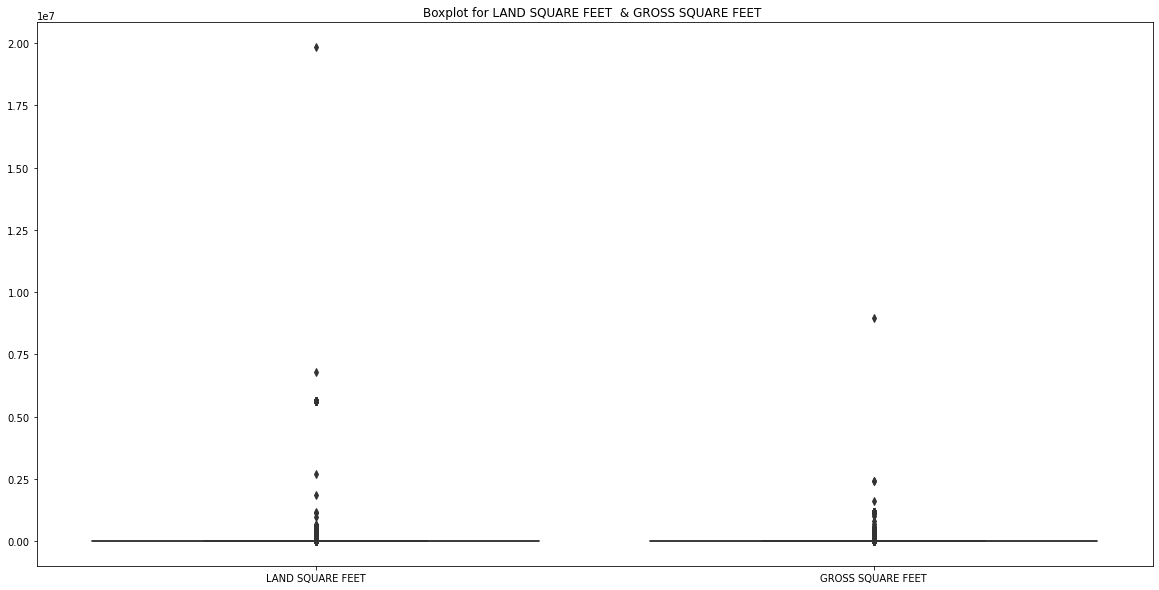

In [80]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['LAND SQUARE FEET','GROSS SQUARE FEET']], palette="winter_r")
plt.title('Boxplot for LAND SQUARE FEET  & GROSS SQUARE FEET ')
plt.show()

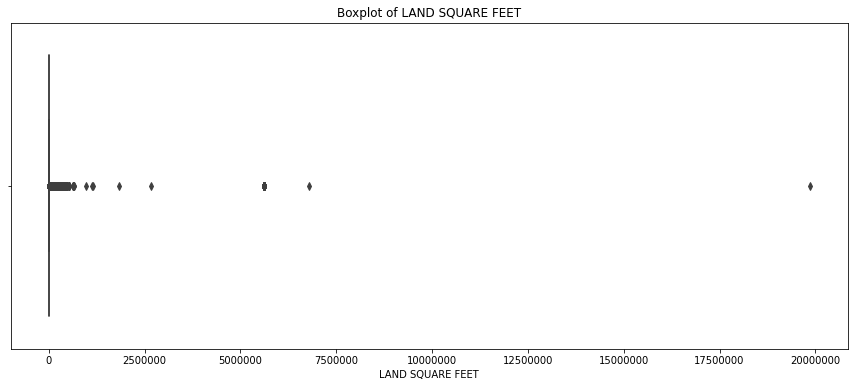

In [81]:
plt.figure(figsize=(15,6))
sns.boxplot(x='LAND SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of LAND SQUARE FEET')
plt.show()

In [82]:
#calculate Interquartile Range IQR
Q1 = df['LAND SQUARE FEET'].quantile(0.25)
Q3 = df['LAND SQUARE FEET'].quantile(0.75)
IQR = Q3 - Q1

In [83]:
df[ df['LAND SQUARE FEET'] > (Q3+1.5*IQR)].shape

(3004, 19)

In [84]:
df[ df['LAND SQUARE FEET'] < (Q1-(1.5*IQR))].shape

(0, 19)

In [85]:
# #remove rows when LAND SQUARE FEET is outliers
# df=df[ df['LAND SQUARE FEET'] < (Q3+1.5*IQR)]

In [86]:
df.shape

(140960, 19)

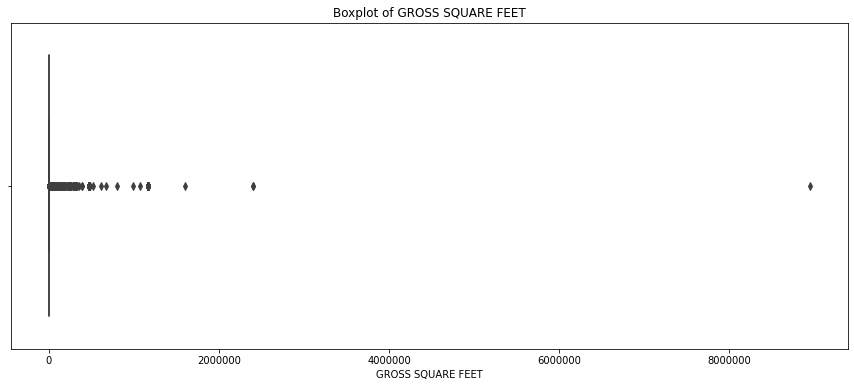

In [87]:
plt.figure(figsize=(15,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of GROSS SQUARE FEET')
plt.show()

In [88]:
#calculate Interquartile Range IQR
Q1 = df['GROSS SQUARE FEET'].quantile(0.25)
Q3 = df['GROSS SQUARE FEET'].quantile(0.75)
IQR = Q3 - Q1

In [89]:
df[ df['GROSS SQUARE FEET'] > (Q3+1.5*IQR)].shape

(1894, 19)

In [90]:
df[ df['GROSS SQUARE FEET'] < (Q1-(1.5*IQR))].shape

(0, 19)

In [91]:
# #remove rows when GROSS SQUARE FEET is outliers
# df=df[ df['GROSS SQUARE FEET'] < (Q3+1.5*IQR)]

In [92]:
df.shape

(140960, 19)

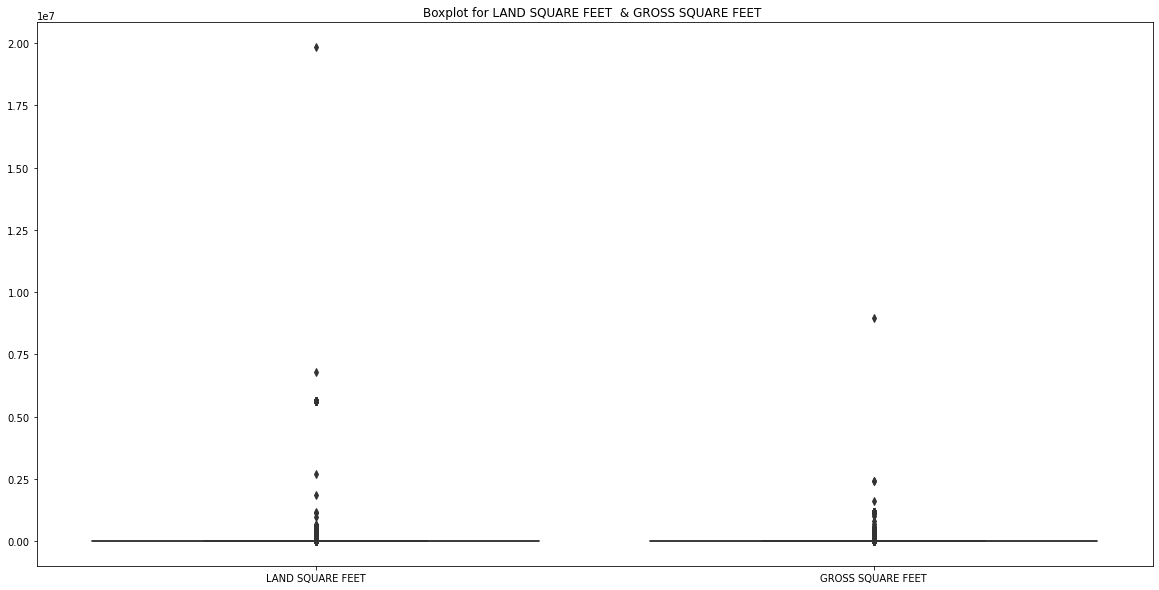

In [93]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['LAND SQUARE FEET','GROSS SQUARE FEET']], palette="winter_r")
plt.title('Boxplot for LAND SQUARE FEET  & GROSS SQUARE FEET ')
plt.show()

###TAX CLASS AT PRESENT & TAX CLASS AT TIME OF SALE

In [94]:
df[['TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']].head()

,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE
5,2,2.0
8,2A,2.0
10,2,2.0
11,2,2.0
12,2A,2.0


In [95]:
df[['TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']].isnull().sum()

TAX CLASS AT PRESENT         87
TAX CLASS AT TIME OF SALE     0
dtype: int64

TAX CLASS AT PRESENT & TAX CLASS AT TIME OF SALE repesent the same content so drop TAX CLASS AT PRESENT that contain missing values

In [96]:
df.drop(['TAX CLASS AT PRESENT'], axis = 1, inplace = True)

###BUILDING CLASS AT PRESENT & BUILDING CLASS AT TIME OF SALE

In [97]:
df[['BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']].head()

,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE
5,C1,C1
8,C3,C3
10,C4,C4
11,C4,C4
12,C2,C2


In [98]:
df[['BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']].isnull().sum()

BUILDING CLASS AT PRESENT         87
BUILDING CLASS AT TIME OF SALE     0
dtype: int64

BUILDING CLASS AT PRESENT & BUILDING CLASS AT TIME OF SALE repesent the same content so drop BUILDING CLASS AT PRESENT that contain missing values

In [99]:
df.drop(['BUILDING CLASS AT PRESENT'], axis = 1, inplace = True)

###COMMERCIAL UNITS & RESIDENTIAL UNITS & TOTAL UNITS

Residential Units: The number of residential units at the listed property. 

Commercial Units: The number of commercial units at the listed property. 

Total Units: The total number of units at the listed property.

In [100]:
df['COMMERCIAL UNITS'].value_counts()

0.0      86619
0        17087
1.0       5590
1          595
2.0        473
3.0        140
2           59
4.0         46
22.0        34
252.0       33
5.0         30
6.0         17
3           17
7.0         12
259.0        7
8.0          7
35.0         5
5            5
4            5
133.0        3
20.0         3
16.0         3
60.0         2
15.0         2
65.0         2
6            2
28.0         2
10.0         2
64.0         2
9.0          2
13           1
16           1
37           1
10           1
18.0         1
48.0         1
116.0        1
33.0         1
7            1
47.0         1
26.0         1
210.0        1
13.0         1
14.0         1
19.0         1
23.0         1
24.0         1
11.0         1
67.0         1
25.0         1
Name: COMMERCIAL UNITS, dtype: int64

In [101]:
df['RESIDENTIAL UNITS'].value_counts()

1.0      46224
2.0      19096
1        16038
0.0      11742
0         7971
         ...  
56.0         1
134.0        1
105.0        1
178.0        1
81.0         1
Name: RESIDENTIAL UNITS, Length: 130, dtype: int64

In [102]:
df['TOTAL UNITS'].value_counts()

1.0      49015
2.0      18941
1        16564
0.0       8974
0         7167
         ...  
108.0        1
53.0         1
37.0         1
38.0         1
81.0         1
Name: TOTAL UNITS, Length: 147, dtype: int64

In [103]:
df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']].head()

,COMMERCIAL UNITS,RESIDENTIAL UNITS,TOTAL UNITS
5,0.0,12.0,12.0
8,0.0,4.0,4.0
10,0.0,19.0,19.0
11,0.0,28.0,28.0
12,0.0,5.0,5.0


In [104]:
df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']].dtypes

COMMERCIAL UNITS     object
RESIDENTIAL UNITS    object
TOTAL UNITS          object
dtype: object

In [105]:
df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']].isnull()

,COMMERCIAL UNITS,RESIDENTIAL UNITS,TOTAL UNITS
5,False,False,False
8,False,False,False
10,False,False,False
11,False,False,False
12,False,False,False
...,...,...,...
271304,False,False,False
271306,False,False,False
271307,False,False,False
271308,False,False,False


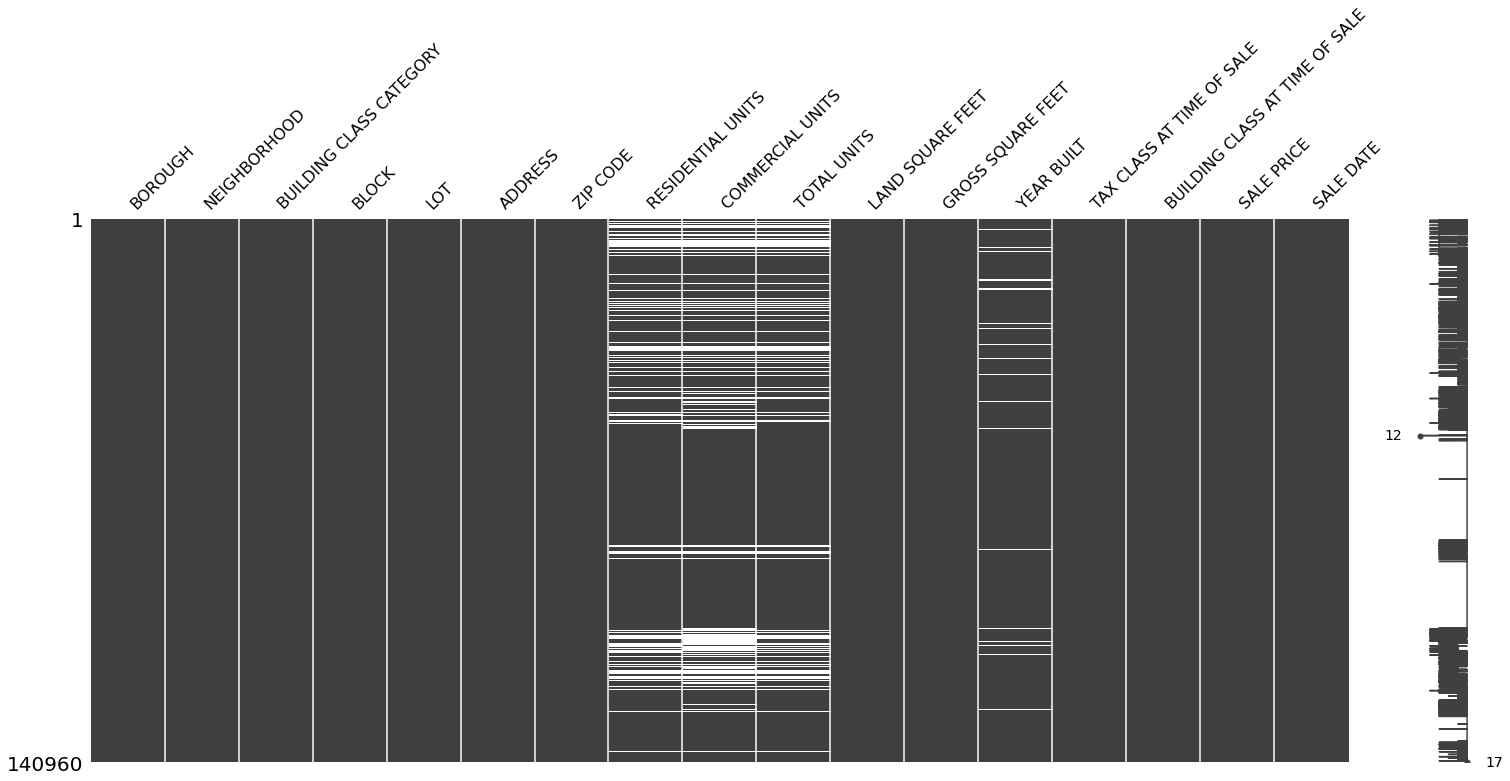

In [106]:
msno.matrix(df)

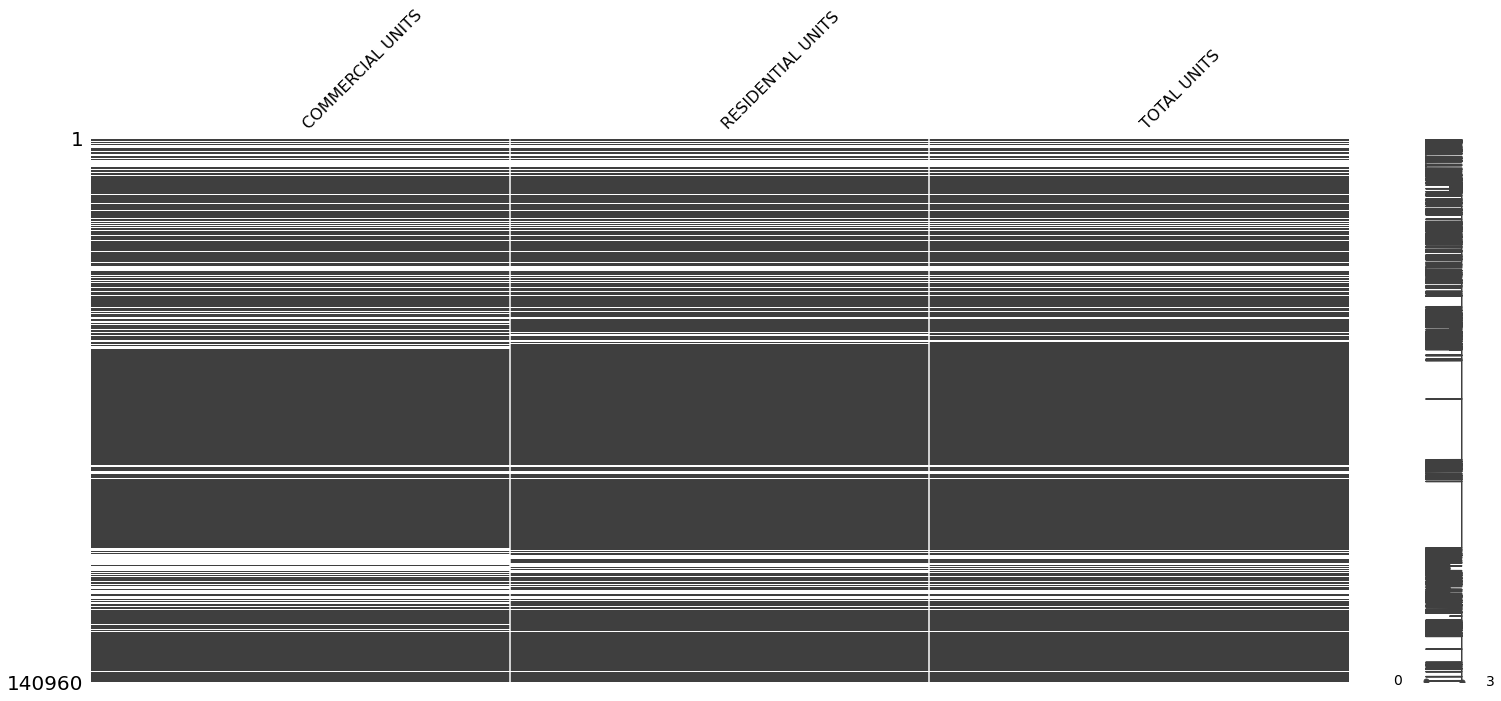

In [107]:
msno.matrix(df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']])

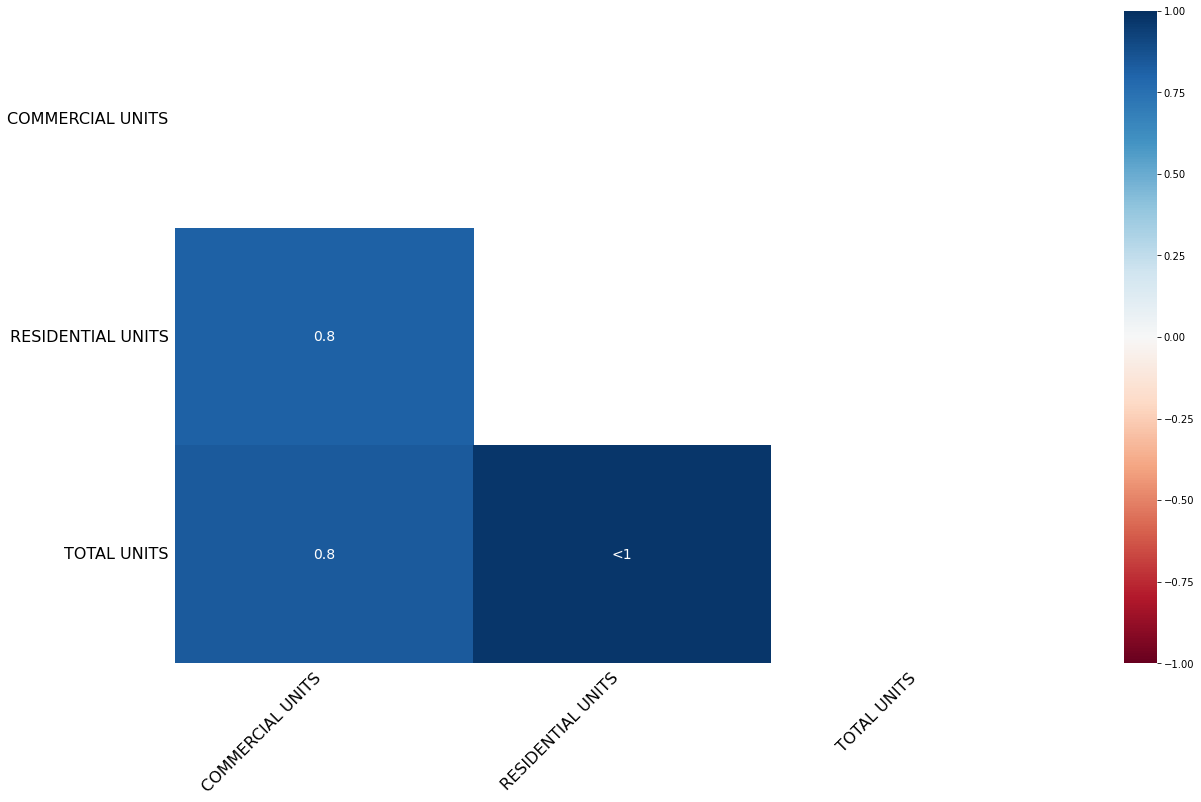

In [108]:
#heapmap for correlation analysis
msno.heatmap(df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']])

In [109]:
df['COMMERCIAL UNITS']=pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce')

In [110]:
df['RESIDENTIAL UNITS']=pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')

In [111]:
df['TOTAL UNITS']=pd.to_numeric(df['TOTAL UNITS'], errors='coerce')

In [112]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [113]:
imputer = IterativeImputer(max_iter=20)
df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']] = imputer.fit_transform(df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']])

In [114]:
df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']].isnull().sum()

COMMERCIAL UNITS     0
RESIDENTIAL UNITS    0
TOTAL UNITS          0
dtype: int64

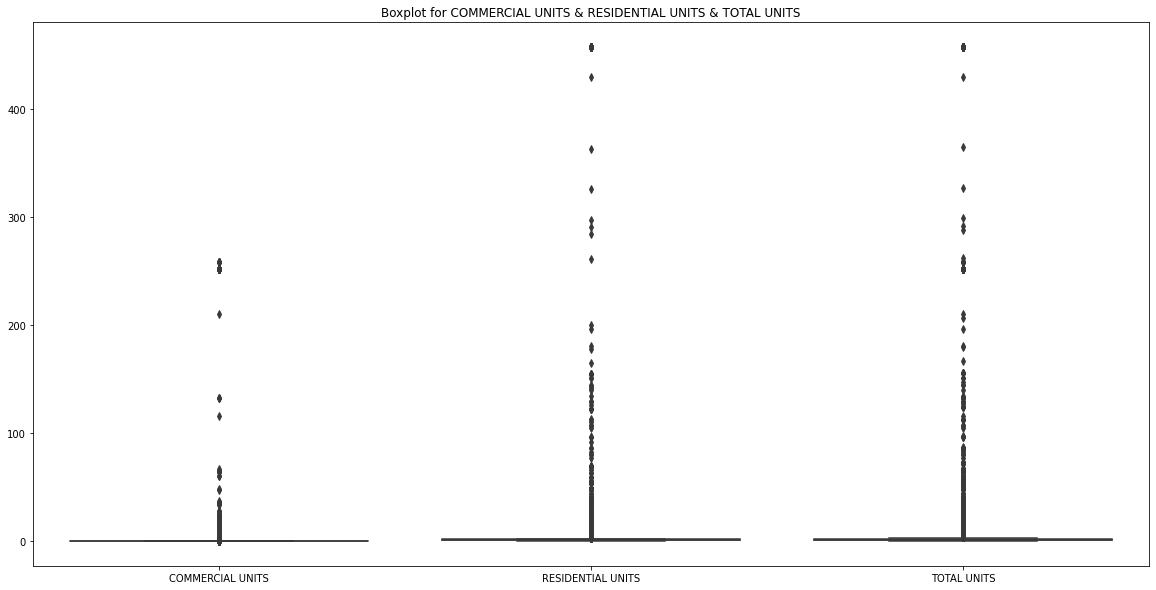

In [115]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['COMMERCIAL UNITS' , 'RESIDENTIAL UNITS' , 'TOTAL UNITS']], palette="winter_r")
plt.title('Boxplot for COMMERCIAL UNITS & RESIDENTIAL UNITS & TOTAL UNITS')
plt.show()

###SALE DATE

In [116]:
df['SALE DATE'].value_counts()

2018-06-28    365
2019-06-27    343
2020-01-30    326
2018-07-31    326
2018-06-29    321
             ... 
2019-07-06      1
2018-09-09      1
2018-04-01      1
2018-09-02      1
2020-07-19      1
Name: SALE DATE, Length: 1027, dtype: int64

In [117]:
# convert SALE DATE into date type
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [118]:
df['SALE DATE'].dtype

dtype('<M8[ns]')

In [119]:
df['YEAR SOLD'] = (df['SALE DATE']).dt.year
df['MONTH SOLD']= (df['SALE DATE']).dt.month

In [120]:
df['YEAR SOLD'].value_counts()

2018    52573
2019    50898
2020    37489
Name: YEAR SOLD, dtype: int64

In [121]:
df['MONTH SOLD'].value_counts()

10    13096
1     12772
6     12398
8     12131
7     12103
3     11659
5     11600
12    11525
2     11231
9     11220
11    11213
4     10012
Name: MONTH SOLD, dtype: int64

###YEAR BUILT

In [122]:
df['YEAR BUILT'].value_counts()

1920.0    10380
1930.0     8370
1925.0     7766
1950.0     5900
1910.0     5020
          ...  
1896.0        1
1874.0        1
1018.0        1
1861.0        1
2021.0        1
Name: YEAR BUILT, Length: 164, dtype: int64

In [123]:
df['YEAR BUILT'].isnull().sum()

5505

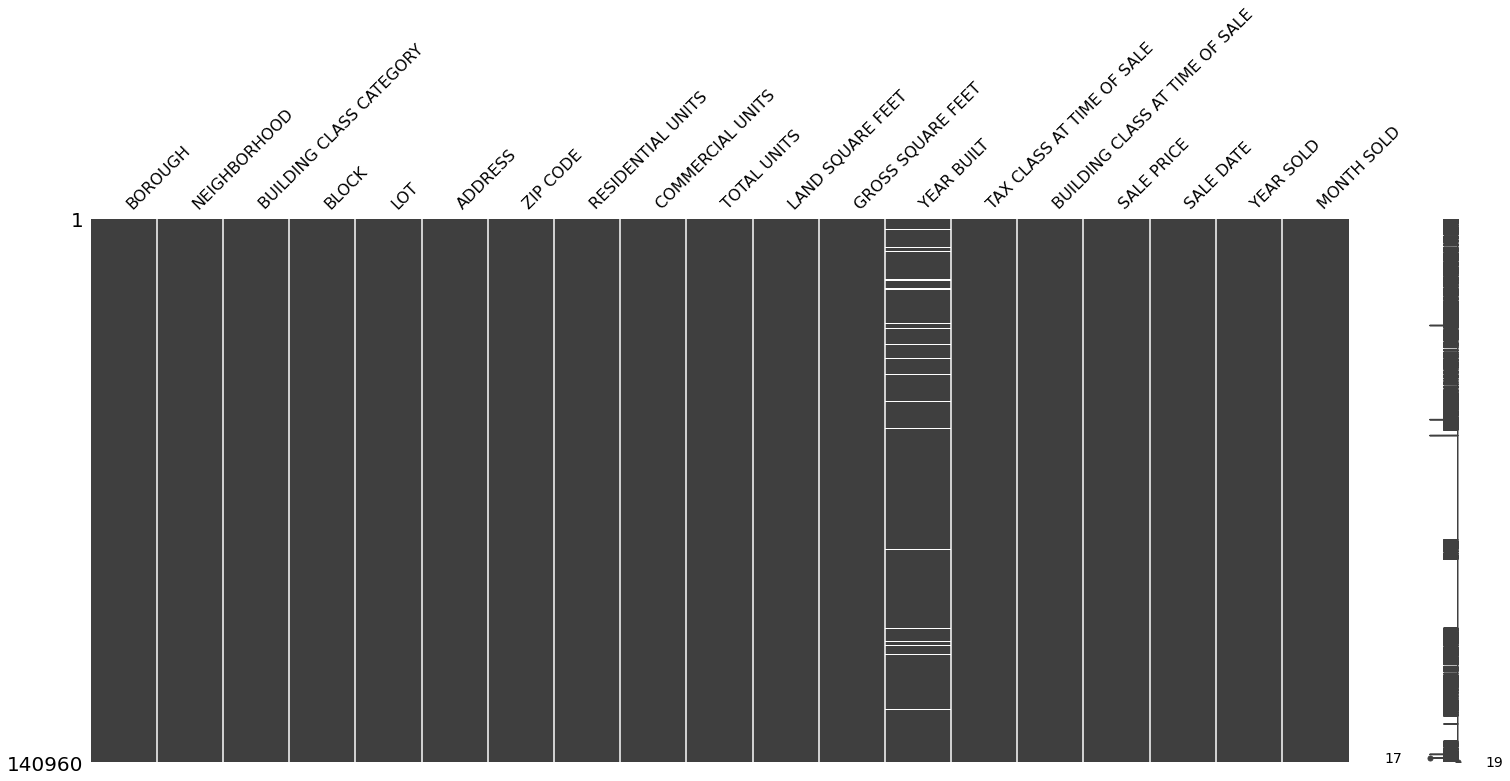

In [124]:
msno.matrix(df)

In [125]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df['YEAR BUILT'] = imputer.fit_transform(df['YEAR BUILT'].values.reshape(-1,1))

In [126]:
df['YEAR BUILT'].isnull().sum()

0

In [127]:
df['YEAR BUILT'].value_counts()

1920.0    15885
1930.0     8370
1925.0     7766
1950.0     5900
1910.0     5020
          ...  
1896.0        1
1874.0        1
1018.0        1
1861.0        1
2021.0        1
Name: YEAR BUILT, Length: 164, dtype: int64

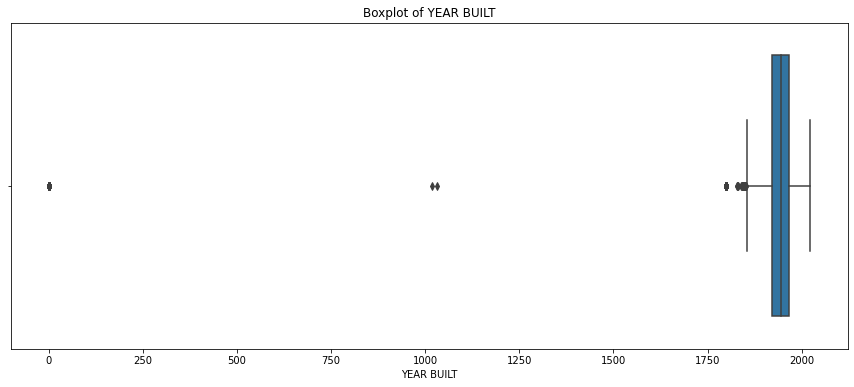

In [128]:
plt.figure(figsize=(15,6))
sns.boxplot(x='YEAR BUILT', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of YEAR BUILT')
plt.show()

In [129]:
df['YEAR BUILT'].describe()

count    140960.000000
mean       1907.437174
std         289.058639
min           0.000000
25%        1921.000000
50%        1945.000000
75%        1967.000000
max        2021.000000
Name: YEAR BUILT, dtype: float64

In [130]:
#calculate Interquartile Range IQR
Q1 = df['YEAR BUILT'].quantile(0.25)
Q3 = df['YEAR BUILT'].quantile(0.75)
IQR = Q3 - Q1

In [131]:
df[ df['YEAR BUILT'] > (Q3+1.5*IQR)].shape

(0, 19)

In [132]:
df[ df['YEAR BUILT'] < (Q1-(1.5*IQR))].shape

(3190, 19)

In [133]:
df['YEAR BUILT'].mode()

0    1920.0
dtype: float64

In [134]:
df['YEAR BUILT'] = np.where(df['YEAR BUILT'] < (Q1-(1.5*IQR)), df['YEAR BUILT'].mode(), df['YEAR BUILT'])

In [135]:
df.shape

(140960, 19)

In [136]:
df['YEAR BUILT'].describe()

count    140960.000000
mean       1950.033875
std          33.479706
min        1855.000000
25%        1921.000000
50%        1945.000000
75%        1967.000000
max        2021.000000
Name: YEAR BUILT, dtype: float64

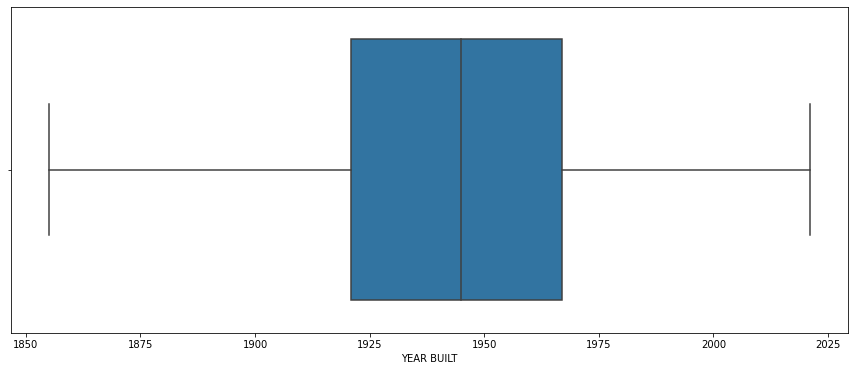

In [137]:
plt.figure(figsize=(15,6))
sns.boxplot(x='YEAR BUILT', data=df)
plt.show()

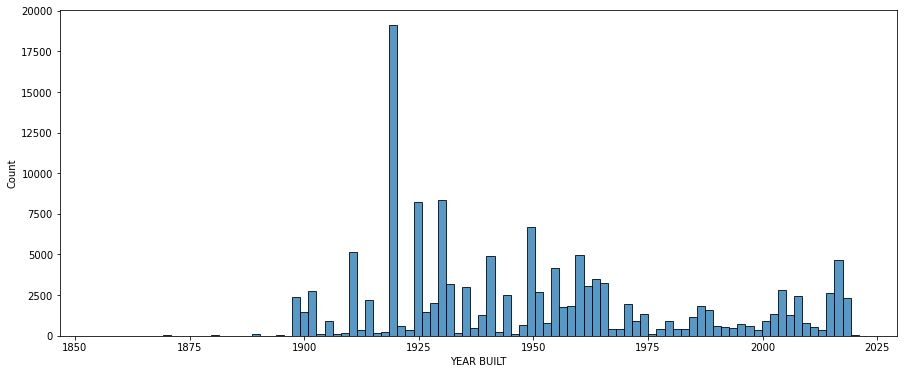

In [138]:
plt.figure(figsize=(15,6))
sns.histplot(df['YEAR BUILT'])
plt.show()

###ZIP CODE

In [139]:
df['ZIP CODE'].value_counts()

10314.0    2808
10312.0    2391
11375.0    2376
10306.0    2089
11234.0    2052
           ... 
10018.0      57
10282.0      16
11430.0       2
11227.0       1
10105.0       1
Name: ZIP CODE, Length: 186, dtype: int64

In [140]:
df['ZIP CODE'].isnull().sum()

10

In [141]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df['ZIP CODE'] = imputer.fit_transform(df['ZIP CODE'].values.reshape(-1,1))

In [142]:
df['ZIP CODE'].isnull().sum()

0

###BOROUGH

In [143]:
df['BOROUGH'].value_counts()

4.0    47484
3.0    37246
1.0    25971
5.0    16127
2.0    14132
Name: BOROUGH, dtype: int64

In [144]:
df['BOROUGH'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


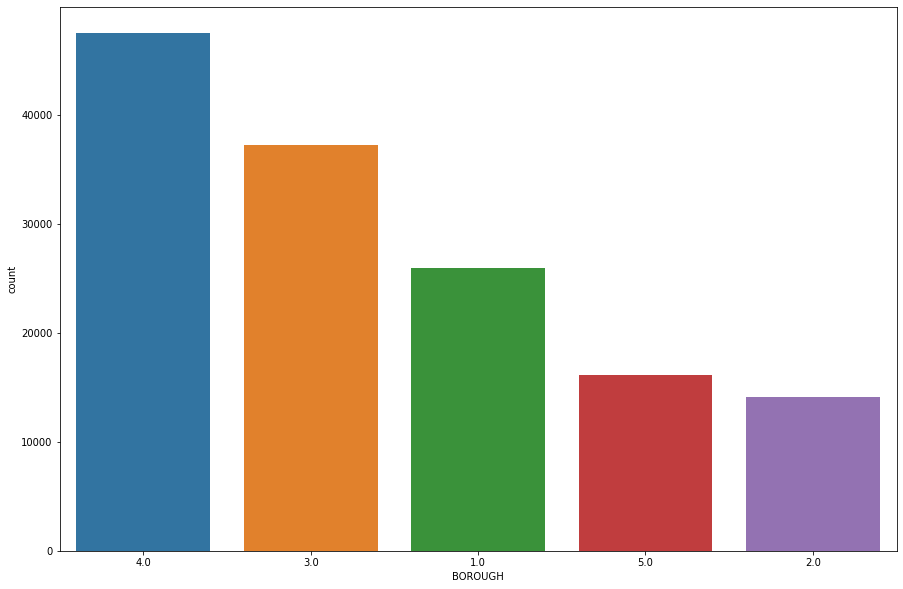

In [145]:
plt.figure(figsize=(15,10))
sns.countplot(df['BOROUGH'], order = df['BOROUGH'].value_counts().index)
plt.show()

###NEIGHBORHOOD

In [146]:
df['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH              4277
UPPER EAST SIDE (59-79)     2633
UPPER EAST SIDE (79-96)     2467
BEDFORD STUYVESANT          2191
UPPER WEST SIDE (59-79)     2188
                            ... 
ROSSVILLE-PORT MOBIL           7
DONGAN HILLS-OLD TOWN          7
BLOOMFIELD                     5
CO-OP CITY                     4
CITY ISLAND-PELHAM STRIP       4
Name: NEIGHBORHOOD, Length: 252, dtype: int64

In [147]:
df['NEIGHBORHOOD'].isnull().sum()

0

###ADDRESS

In [148]:
df['ADDRESS'].value_counts()

 184 KENT AVENUE             68
 25-19 43RD AVENUE           67
 319 SCHERMERHORN STREET     56
 550 VANDERBILT AVENUE       52
 2128 OCEAN AVENUE           50
                             ..
18 VAN BUREN STREET, 4R       1
18 VAN BUREN STREET, 4F       1
18 VAN BUREN STREET, 3R       1
18 VAN BUREN STREET, 3F       1
N/A QUAIL LANE                1
Name: ADDRESS, Length: 131091, dtype: int64

In [149]:
df['ADDRESS'].isnull().sum()

0

###LOT

In [150]:
df['LOT'].value_counts()

1.0       7442
23.0      1637
50.0      1618
20.0      1592
10.0      1583
          ... 
4151.0       1
4177.0       1
1921.0       1
4576.0       1
555.0        1
Name: LOT, Length: 3179, dtype: int64

In [151]:
df['LOT'].isnull().sum()

0

###BLOCK

In [152]:
df['BLOCK'].value_counts()

3944.0     344
8489.0     337
16.0       335
1158.0     314
1171.0     267
          ... 
15637.0      1
8552.0       1
8553.0       1
15588.0      1
2085.0       1
Name: BLOCK, Length: 12462, dtype: int64

In [153]:
df['BLOCK'].isnull().sum()

0

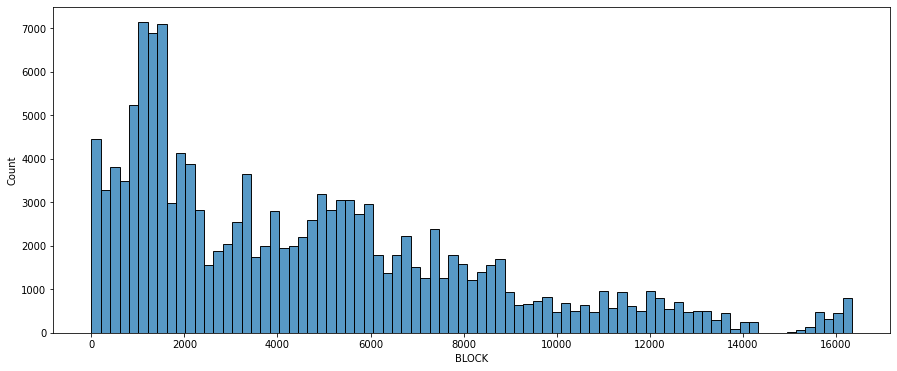

In [154]:
plt.figure(figsize=(15,6))
sns.histplot(df['BLOCK'])
plt.show()

###BUILDING CLASS CATEGORY

In [155]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                       35336
10 COOPS - ELEVATOR APARTMENTS                27368
02 TWO FAMILY DWELLINGS                       25854
13 CONDOS - ELEVATOR APARTMENTS               18882
09 COOPS - WALKUP APARTMENTS                   6227
03 THREE FAMILY DWELLINGS                      5865
04 TAX CLASS 1 CONDOS                          3221
15 CONDOS - 2-10 UNIT RESIDENTIAL              2884
07 RENTALS - WALKUP APARTMENTS                 2536
17 CONDO COOPS                                 2402
12 CONDOS - WALKUP APARTMENTS                  2158
44 CONDO PARKING                               1847
05 TAX CLASS 1 VACANT LAND                     1471
22 STORE BUILDINGS                              794
14 RENTALS - 4-10 UNIT                          532
29 COMMERCIAL GARAGES                           478
47 CONDO NON-BUSINESS STORAGE                   436
43 CONDO OFFICE BUILDINGS                       396
31 COMMERCIAL VACANT LAND                       350
21 OFFICE BU

In [156]:
df['BUILDING CLASS CATEGORY'].isnull().sum()

0

##Q

Text(0.5, 1.0, 'Sale Price per Borough')

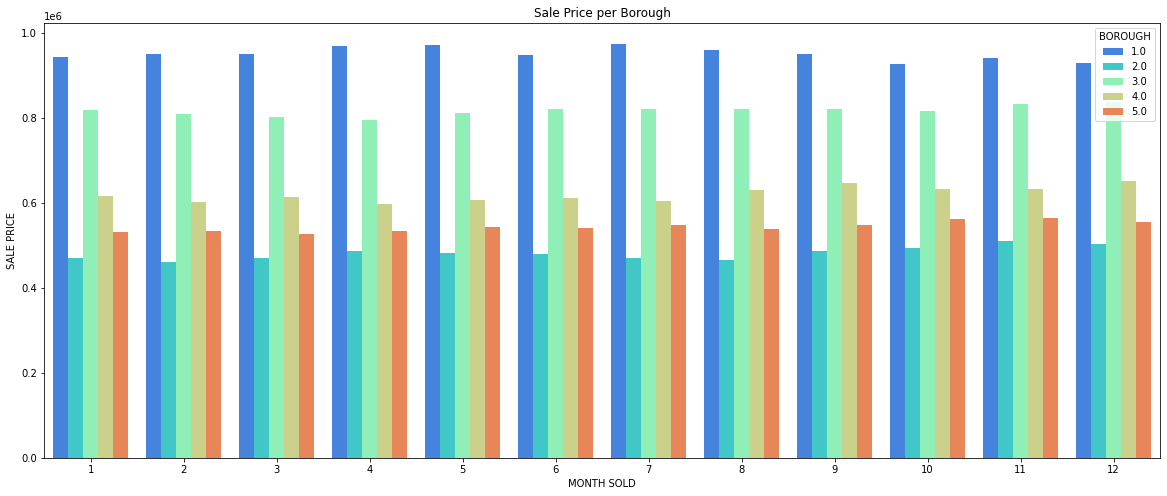

In [158]:
plt.figure(figsize=(20,8))
sns.barplot(x='MONTH SOLD', y='SALE PRICE', hue='BOROUGH', data=df, palette='rainbow', ci=None)
plt.title('Sale Price per Borough')


#Feature Engineering

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140960 entries, 5 to 271309
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         140960 non-null  float64       
 1   NEIGHBORHOOD                    140960 non-null  object        
 2   BUILDING CLASS CATEGORY         140960 non-null  object        
 3   BLOCK                           140960 non-null  float64       
 4   LOT                             140960 non-null  float64       
 5   ADDRESS                         140960 non-null  object        
 6   ZIP CODE                        140960 non-null  float64       
 7   RESIDENTIAL UNITS               140960 non-null  float64       
 8   COMMERCIAL UNITS                140960 non-null  float64       
 9   TOTAL UNITS                     140960 non-null  float64       
 10  LAND SQUARE FEET                140960 non-null  int64  

Text(0.5, 1.0, 'Correlation Matrix')

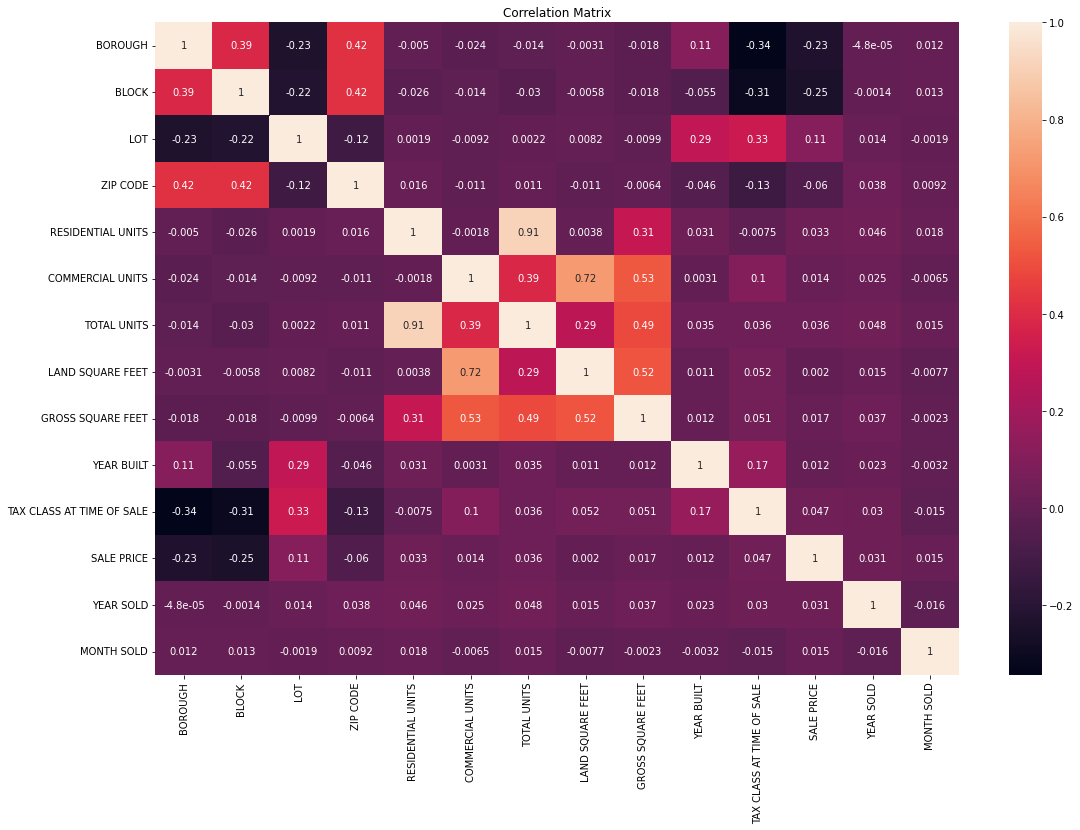

In [160]:
plt.rcParams["figure.figsize"] = (18,12) 
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

In [161]:
# Select categorical columns
categorical_feature = [f for f in df.columns if df[f].dtype == "object"]
categorical_feature

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'ADDRESS',
 'BUILDING CLASS AT TIME OF SALE']

In [162]:
#ZIP CODE represent the same informatio in ADDRESS ,  so drop ADDRESS
df.drop(['ADDRESS'], axis = 1, inplace = True)

In [163]:
df['NEIGHBORHOOD'].nunique()

252

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
df['NEIGHBORHOOD'] = LabelEncoder().fit_transform(df['NEIGHBORHOOD'])

In [166]:
df['BUILDING CLASS CATEGORY'].nunique()

46

In [167]:
df['BUILDING CLASS CATEGORY'] = LabelEncoder().fit_transform(df['BUILDING CLASS CATEGORY'])

In [168]:
df['BUILDING CLASS AT TIME OF SALE'].nunique()

262

In [169]:
df['BUILDING CLASS AT TIME OF SALE'] = LabelEncoder().fit_transform(df['BUILDING CLASS AT TIME OF SALE'])

In [170]:
# Select numerical columns
numerical_feature = [f for f in df.columns if df[f].dtype != 'object']
numerical_feature

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE',
 'YEAR SOLD',
 'MONTH SOLD']

In [171]:
#YEAR SOLD & MONTH SOLD represent the information in SALE DATE , SO drop SALE DATE
df.drop(['SALE DATE'], axis = 1, inplace = True)

In [172]:
from sklearn.preprocessing import StandardScaler
#normalize the data
df = pd.DataFrame(StandardScaler().fit_transform(df.to_numpy()), columns=list(df.columns))

In [173]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,YEAR SOLD,MONTH SOLD
0,-1.646325,-1.732406,-0.066271,-1.136122,-0.523446,-1.200913,1.002765,-0.04019,0.895227,-0.033979,0.162671,1.522304,0.616502,0.317685,2.723131,0.135091,0.43025
1,-1.646325,-1.732406,-0.066271,-1.135044,-0.523446,-1.200913,0.230392,-0.04019,0.190435,-0.037187,0.049748,-1.494459,0.616502,0.345298,-0.242259,0.135091,1.58721
2,-1.646325,-1.732406,-0.066271,-1.135044,-0.510871,-1.200913,1.678592,-0.04019,1.511919,-0.030339,0.317526,-0.897080,0.616502,0.359104,1.227626,0.135091,1.58721
3,-1.646325,-1.732406,-0.066271,-1.135044,-0.495152,-1.200913,2.547512,-0.04019,2.304809,-0.013338,0.464930,-1.494459,0.616502,0.359104,-0.187345,0.135091,0.71949
4,-1.646325,-1.732406,-0.066271,-1.134774,-0.481005,-1.200913,0.326939,-0.04019,0.278534,-0.036130,0.112761,-1.494459,0.616502,0.331491,1.020778,0.135091,0.43025


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140960 entries, 0 to 140959
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         140960 non-null  float64
 1   NEIGHBORHOOD                    140960 non-null  float64
 2   BUILDING CLASS CATEGORY         140960 non-null  float64
 3   BLOCK                           140960 non-null  float64
 4   LOT                             140960 non-null  float64
 5   ZIP CODE                        140960 non-null  float64
 6   RESIDENTIAL UNITS               140960 non-null  float64
 7   COMMERCIAL UNITS                140960 non-null  float64
 8   TOTAL UNITS                     140960 non-null  float64
 9   LAND SQUARE FEET                140960 non-null  float64
 10  GROSS SQUARE FEET               140960 non-null  float64
 11  YEAR BUILT                      140960 non-null  float64
 12  TAX CLASS AT TIM

In [175]:
X=df.loc[:, df.columns != 'SALE PRICE']

In [176]:
y=df['SALE PRICE']

In [177]:
X.shape

(140960, 16)

In [178]:
y.shape

(140960,)

In [180]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators=100)

In [181]:
RFR_model.fit(X, y)

RandomForestRegressor()

In [182]:
df_imf = pd.DataFrame({'Feature': pd.DataFrame(X).columns, 'Feature_importances': RFR_model.feature_importances_})

In [183]:
df_imf.set_index('Feature_importances')

,Feature
Feature_importances,
0.044321,BOROUGH
0.044499,NEIGHBORHOOD
0.060278,BUILDING CLASS CATEGORY
0.234595,BLOCK
0.110207,LOT
0.084033,ZIP CODE
0.009125,RESIDENTIAL UNITS
0.005717,COMMERCIAL UNITS
0.009987,TOTAL UNITS


In [184]:
# df_imf = df_imf.sort_values('Feature_importances')

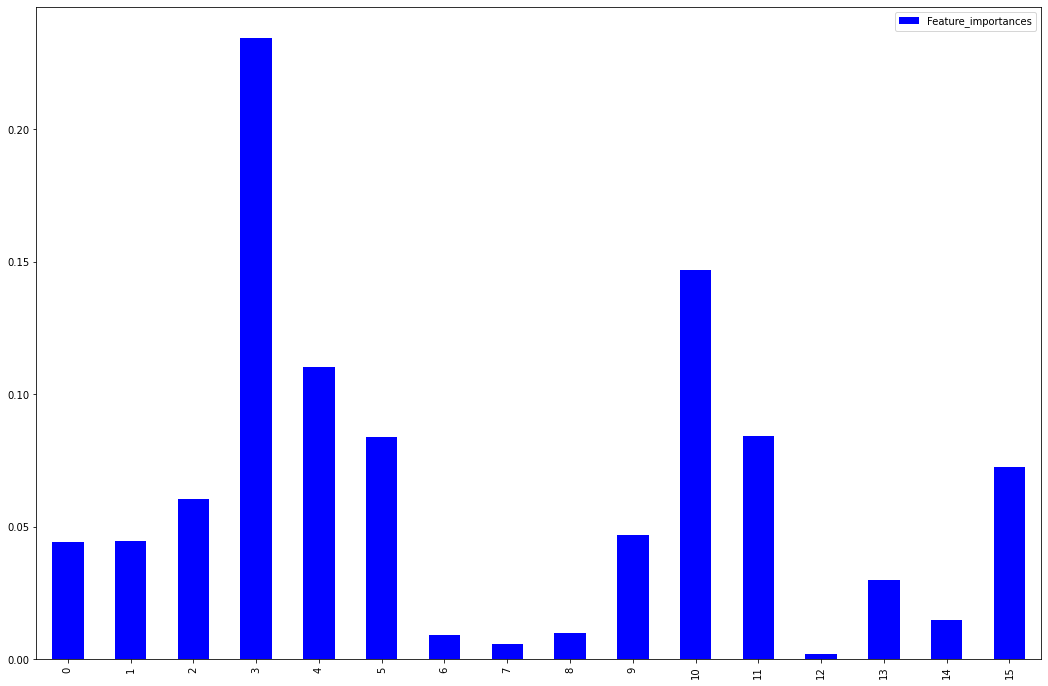

In [185]:
df_imf.plot.bar(color = 'blue')

In [186]:
df_imf.values

array([['BOROUGH', 0.04432110493426648],
       ['NEIGHBORHOOD', 0.04449889466886447],
       ['BUILDING CLASS CATEGORY', 0.06027837105298284],
       ['BLOCK', 0.23459541293308],
       ['LOT', 0.11020660522762467],
       ['ZIP CODE', 0.08403260280666208],
       ['RESIDENTIAL UNITS', 0.009125239974012232],
       ['COMMERCIAL UNITS', 0.005717297028023045],
       ['TOTAL UNITS', 0.009987162715270231],
       ['LAND SQUARE FEET', 0.04691622651351635],
       ['GROSS SQUARE FEET', 0.14706204670022818],
       ['YEAR BUILT', 0.08437210930860706],
       ['TAX CLASS AT TIME OF SALE', 0.0018153297802799891],
       ['BUILDING CLASS AT TIME OF SALE', 0.02993890074154973],
       ['YEAR SOLD', 0.014751687606874831],
       ['MONTH SOLD', 0.07238100800815778]], dtype=object)

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [180]:
print("X_train.shape >>>> ",X_train.shape)
print("y_train.shape >>>> ",y_train.shape)
print("X_test.shape >>>> ",X_test.shape)
print("y_test.shape >>>> ",y_test.shape)

X_train.shape >>>>  (98672, 16)
y_train.shape >>>>  (98672,)
X_test.shape >>>>  (42288, 16)
y_test.shape >>>>  (42288,)


#MOdel

###RandomForestRegressor

In [181]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100)

In [182]:
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [183]:
RF_model.score(X_train,y_train)

0.9274608228775463

In [184]:
y_pred_RF = RF_model.predict(X_test)

In [185]:
import sklearn.metrics as metrics

In [186]:
print("Test MSE score >>>>> ",metrics.mean_squared_error(y_test,y_pred_RF))
print("Test R2 score >>>>> ",metrics.r2_score(y_test,y_pred_RF))

Test MSE score >>>>>  0.45080514583302544
Test R2 score >>>>>  0.5465069618286069


###LinearRegression

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
LR_model = LinearRegression()

In [205]:
LR_model.fit(X_train,y_train)

LinearRegression()

In [206]:
y_pred_lr = RF_model.predict(X_test)

In [207]:
print("Test MSE score >>>>> ",metrics.mean_squared_error(y_test,y_pred_lr))
print("Test R2 score >>>>> ",metrics.r2_score(y_test,y_pred_lr))

Test MSE score >>>>>  0.45080514583302544
Test R2 score >>>>>  0.5465069618286069


##AutoML

In [196]:
pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 36.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 57.8 MB/s 
     |████████████████████████████████| 260 kB 75.3 MB/s 
     |████████████████████████████████| 4.4 MB 54.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 46 kB 5.1 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=904cf73295678d78e594c26a5cbd654096398a1729463bf80dcd86b339385a40
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=c27e199a50f34aeed44fb1a47d4b9afa93354a733b15a42abfc257a23258709a
  St

In [187]:
from pprint import pprint
import sklearn.metrics
import autosklearn.regression

In [196]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=400,per_run_time_limit=200)


In [197]:
automl.fit(X_train, y_train, dataset_name='nyc')

[WARNING] [2022-12-12 19:20:22,952:Client-AutoML(1):nyc] Capping the per_run_time_limit to 199.0 to have time for a least 2 models in each process.
[WARNING] [2022-12-12 19:23:44,272:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     memory_limit=8192, per_run_time_limit=200,
                     time_left_for_this_task=400)

In [198]:
# View the models found by auto-sklearn...
print(automl.leaderboard())

          rank  ensemble_weight         type      cost   duration
model_id                                                         
3            1              1.0  extra_trees  0.483252  36.976794


In [199]:
# Print the final ensemble constructed by auto-sklearn...
pprint(automl.show_models(), indent=4)

{   3: {   'cost': 0.4832518806821746,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fbf6a97ca10>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fbf6a8edd90>,
           'model_id': 3,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fbf6a980750>,
           'sklearn_regressor': ExtraTreesRegressor(bootstrap=True, max_features=0.5535883939348928,
                    min_samples_leaf=2, min_samples_split=16, n_estimators=512,
                    n_jobs=1, random_state=1, warm_start=True)}}


In [200]:
# Get the Score of the final ensemble...
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.6053704217385438
Test R2 score: 0.5244794999425202


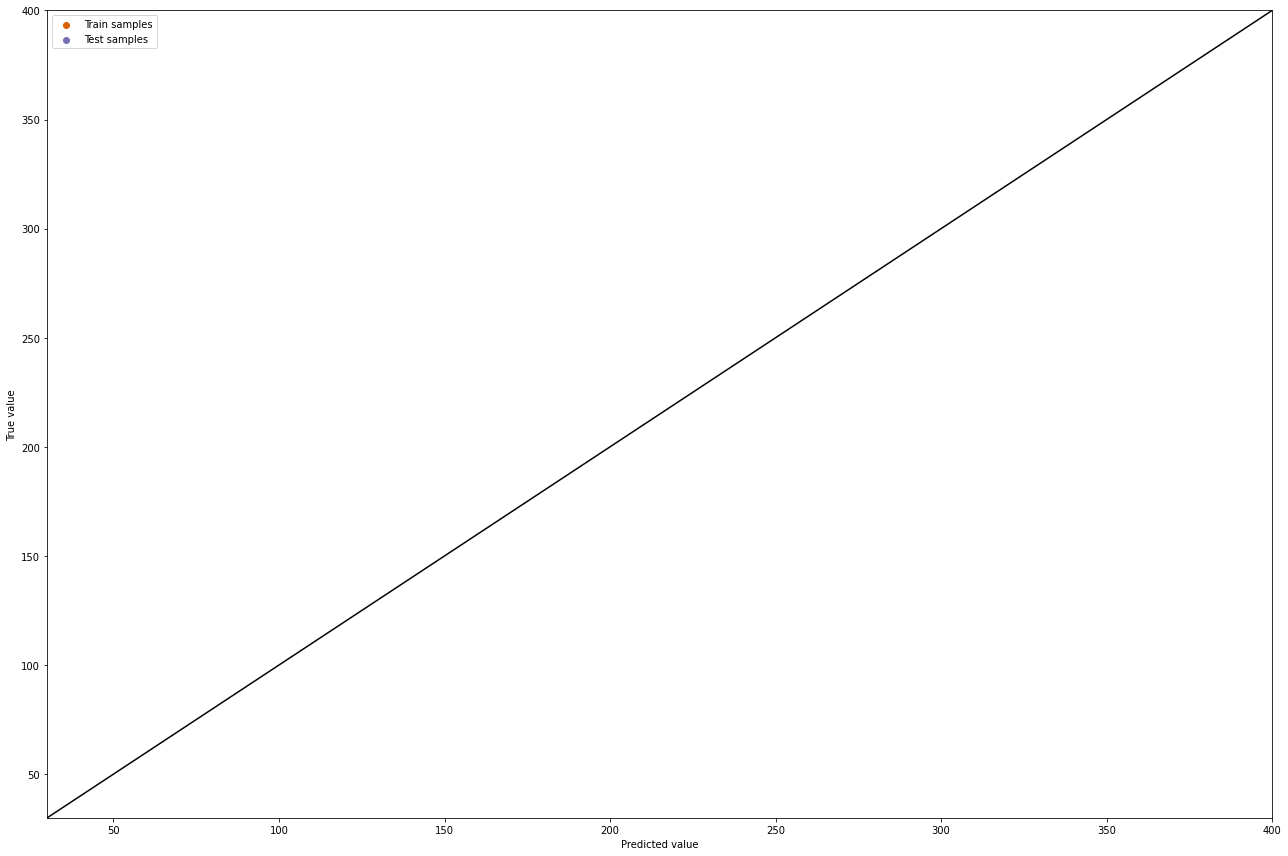

In [201]:
# Plot the predictions...
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
#                ,  ,                                              
plt.plot([30, 400], [30, 400], c='k', zorder=0)  
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()